数据探索与可视化
实验目标
学习并掌握如何使用Python进行数据探索与可视化。
理解并应用数据探索的基本方法，包括数据清洗、格式化和描述性统计分析。
使用Matplotlib和Seaborn等可视化工具，绘制不同类型的图表，分析数据分布及特征之间的关系。
利用pandas_profiling生成数据的交互式报告，全面了解数据的分布、缺失值和异常值。


1.使用pandas读取数据集github_bot_processed_data.csv。探索pandas的显示选项，以便查看更多数据行和列。

In [1]:
import pandas as pd
df = pd.read_csv("github_bot_processed_data.csv")
pd.set_option('display.max_rows', 10)
df

pd.set_option('display.max_columns', 10)
df

label  type  site_admin  company   blog  ...  followers  following  \
0      Human  True       False    False  False  ...          5          1   
1      Human  True       False    False   True  ...          9          6   
2      Human  True       False     True   True  ...       1212        221   
3        Bot  True       False    False  False  ...         84          2   
4      Human  True       False    False  False  ...          6          2   
...      ...   ...         ...      ...    ...  ...        ...        ...   
19763    Bot  True       False     True   True  ...         11          4   
19764  Human  True       False    False  False  ...          3          0   
19765  Human  True       False     True  False  ...         10          1   
19766  Human  True       False     True  False  ...          2          0   
19767    Bot  True       False    False  False  ...          1          0   

                      created_at                 updated_at  text_bot_count  
0      2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0  
1      2015-06-29 10:12:46+00:00  2023-10-07 06:26:14+00:00               0  
2      2008-08-29 16:20:03+00:00  2023-10-02 02:11:21+00:00               0  
3      2014-05-20 18:43:09+00:00  2023-10-12 12:54:59+00:00               0  
4      2012-08-16 14:19:13+00:00  2023-10-06 11:58:41+00:00               0  
...                          ...                        ...             ...  
19763  2014-07-02 23:27:34+00:00  2023-08-15 16:38:34+00:00               0  
19764  2017-12-06 21:56:31+00:00  2023-07-26 18:32:25+00:00               0  
19765  2015-11-14 14:44:05+00:00  2022-08-23 21:09:49+00:00               0  
19766  2021-11-23 18:55:29+00:00  2023-10-06 22:50:45+00:00               0  
19767  2016-04-22 22:11:59+00:00  2022-07-07 19:48:21+00:00               0  

[19768 rows x 15 columns]

2.使用head()方法查看数据的前几行，并使用info()方法查看每列的数据类型，观察两者的区别。 使用describe()方法生成数据的描述性统计信息。

In [2]:
print("数据的前几行：")
print(df.head())

print("\n每列的数据类型及信息：")
df.info()

print("\n数据的描述性统计信息：")
print(df.describe())

数据的前几行：
   label  type  site_admin  company   blog  ...  followers  following  \
0  Human  True       False    False  False  ...          5          1   
1  Human  True       False    False   True  ...          9          6   
2  Human  True       False     True   True  ...       1212        221   
3    Bot  True       False    False  False  ...         84          2   
4  Human  True       False    False  False  ...          6          2   

                  created_at                 updated_at  text_bot_count  
0  2011-09-26 17:27:03+00:00  2023-10-13 11:21:10+00:00               0  
1  2015-06-29 10:12:46+00:00  2023-10-07 06:26:14+00:00               0  
2  2008-08-29 16:20:03+00:00  2023-10-02 02:11:21+00:00               0  
3  2014-05-20 18:43:09+00:00  2023-10-12 12:54:59+00:00               0  
4  2012-08-16 14:19:13+00:00  2023-10-06 11:58:41+00:00               0  

[5 rows x 15 columns]

每列的数据类型及信息：
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 197

3.对数据进行格式化处理，并展示不同格式（例如，日期、货币、百分比等）的效果。

In [3]:
# 1. 日期格式处理
df['created_at'] = pd.to_datetime(df['created_at'])
formatted_date = df['created_at'].dt.strftime('%Y-%m-%d')
print("格式化后的日期列：")
print(formatted_date)

# 2. 数值转换为货币格式
formatted_currency = df['followers'].map('${:,.2f}'.format)
print("\n格式化后的货币格式列：")
print(formatted_currency)

# 3. 数值转换为百分比格式
df['following'] = df['following'].astype(float)  # 确保是数值类型
formatted_percentage = df['following'].map('{:.2%}'.format)
print("\n格式化后的百分比格式列：")
print(formatted_percentage)

格式化后的日期列：
0        2011-09-26
1        2015-06-29
2        2008-08-29
3        2014-05-20
4        2012-08-16
            ...    
19763    2014-07-02
19764    2017-12-06
19765    2015-11-14
19766    2021-11-23
19767    2016-04-22
Name: created_at, Length: 19768, dtype: object

格式化后的货币格式列：
0            $5.00
1            $9.00
2        $1,212.00
3           $84.00
4            $6.00
           ...    
19763       $11.00
19764        $3.00
19765       $10.00
19766        $2.00
19767        $1.00
Name: followers, Length: 19768, dtype: object

格式化后的百分比格式列：
0          100.00%
1          600.00%
2        22100.00%
3          200.00%
4          200.00%
           ...    
19763      400.00%
19764        0.00%
19765      100.00%
19766        0.00%
19767        0.00%
Name: following, Length: 19768, dtype: object


4.对public_repos、public_gists、followers、following等列进行对数变换，并查看其影响。

In [4]:
import numpy as np

df = df[df['public_repos']!= 0]
df = df[df['public_gists']!= 0]
df = df[df['followers']!= 0]
df = df[df['following']!= 0]

df['public_repos_log'] = np.log(df['public_repos'])
df['public_gists_log'] = np.log(df['public_gists'])
df['followers_log'] = np.log(df['followers'])
df['following_log'] = np.log(df['following'])

print("原始列的描述性统计信息：")
print(df[['public_repos', 'public_gists', 'followers', 'following']].describe())

# 查看对数变换后列的描述性统计信息
print("\n对数变换后列的描述性统计信息：")
print(df[['public_repos_log', 'public_gists_log', 'followers_log', 'following_log']].describe())


原始列的描述性统计信息：
       public_repos  public_gists     followers     following
count   9647.000000   9647.000000   9647.000000   9647.000000
mean     130.519021     37.386545    392.057531     77.807090
std      759.477811    653.963588   2065.505921    419.735762
min        1.000000      1.000000      1.000000      1.000000
25%       33.000000      3.000000     30.000000      5.000000
50%       68.000000      8.000000     83.000000     17.000000
75%      129.000000     24.000000    234.000000     51.000000
max    50000.000000  55781.000000  95752.000000  16741.000000

对数变换后列的描述性统计信息：
       public_repos_log  public_gists_log  followers_log  following_log
count       9647.000000       9647.000000    9647.000000    9647.000000
mean           4.162611          2.152867       4.459747       2.811915
std            1.085889          1.461644       1.598177       1.642317
min            0.000000          0.000000       0.000000       0.000000
25%            3.496508          1.098612       3.40

5.使用Matplotlib绘制图表
绘制条形图：展示label列的类别分布。
绘制堆积柱状图：展示多个布尔特征（如site_admin、company等）的分布。
绘制直方图：展示log_public_repos的对数变换后的数据分布。
绘制散点图：展示public_repos与followers之间的关系。
绘制散点矩阵：展示多个数值型特征之间的成对关系。

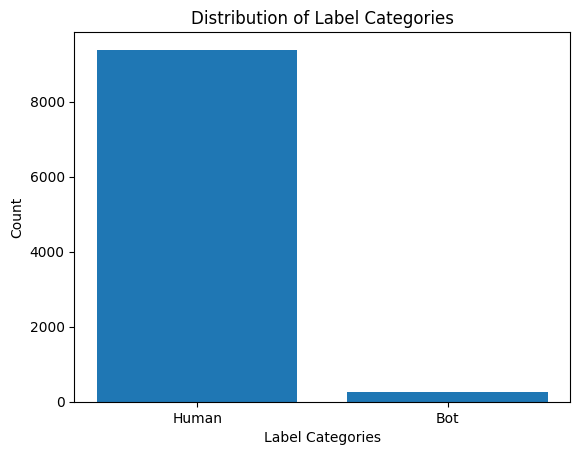

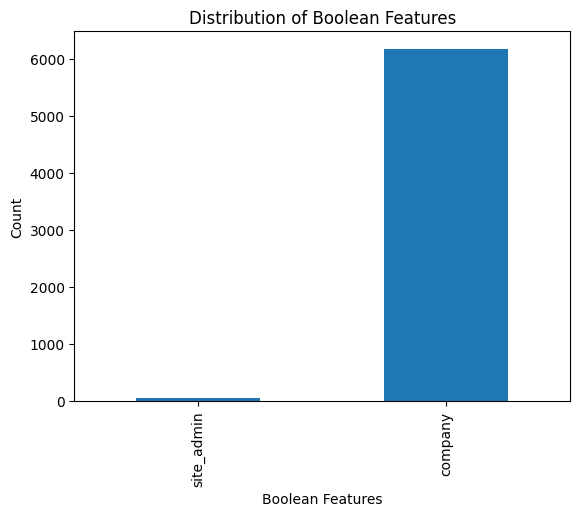

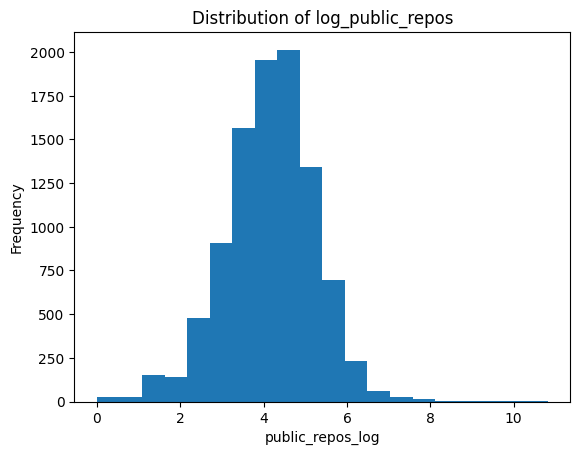

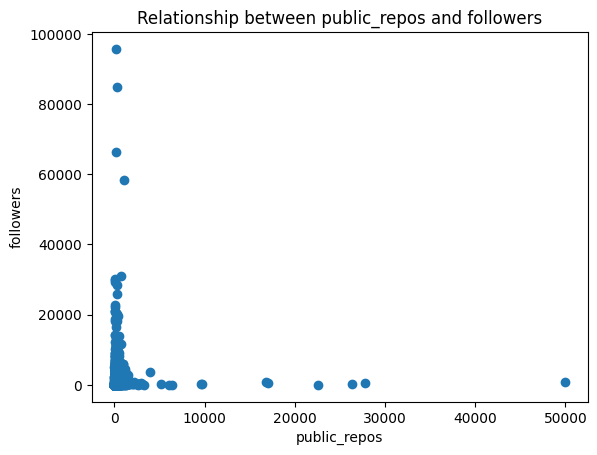

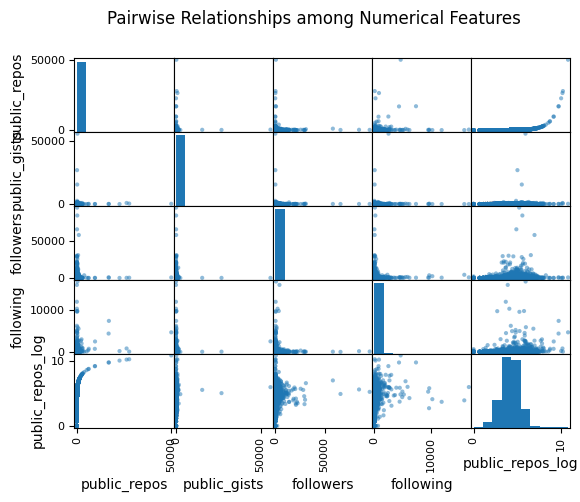

In [5]:
import matplotlib.pyplot as plt

# 1. 绘制条形图
label_counts = df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Label Categories')
plt.ylabel('Count')
plt.title('Distribution of Label Categories')
plt.show()

# 2. 绘制堆积柱状图
bool_features = ['site_admin', 'company']
df[bool_features].sum().plot(kind='bar', stacked=True)
plt.xlabel('Boolean Features')
plt.ylabel('Count')
plt.title('Distribution of Boolean Features')
plt.show()

# 3. 绘制直方图
plt.hist(df['public_repos_log'], bins=20) 
plt.xlabel('public_repos_log')
plt.ylabel('Frequency')
plt.title('Distribution of log_public_repos')
plt.show()

# 4. 绘制散点图
plt.scatter(df['public_repos'], df['followers'])
plt.xlabel('public_repos')
plt.ylabel('followers')
plt.title('Relationship between public_repos and followers')
plt.show()

# 5. 绘制散点矩阵
numeric_features = ['public_repos', 'public_gists', 'followers', 'following', 'public_repos_log']
pd.plotting.scatter_matrix(df[numeric_features], diagonal='hist')
plt.suptitle('Pairwise Relationships among Numerical Features')
plt.show()

6.使用Seaborn绘制图表
绘制箱线图：展示不同label类别下log_followers的分布。
绘制成对图：展示不同特征之间的成对关系，并根据label分类。
绘制热图：展示log_public_repos、log_public_gists、log_followers和log_following等特征之间的相关性。
绘制小提琴图：展示label与log_followers之间的分布差异。

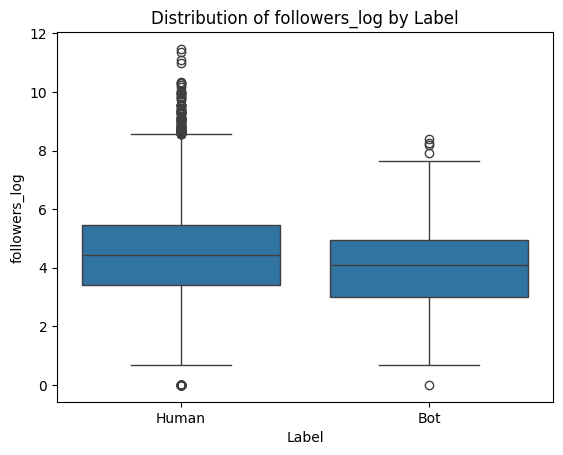

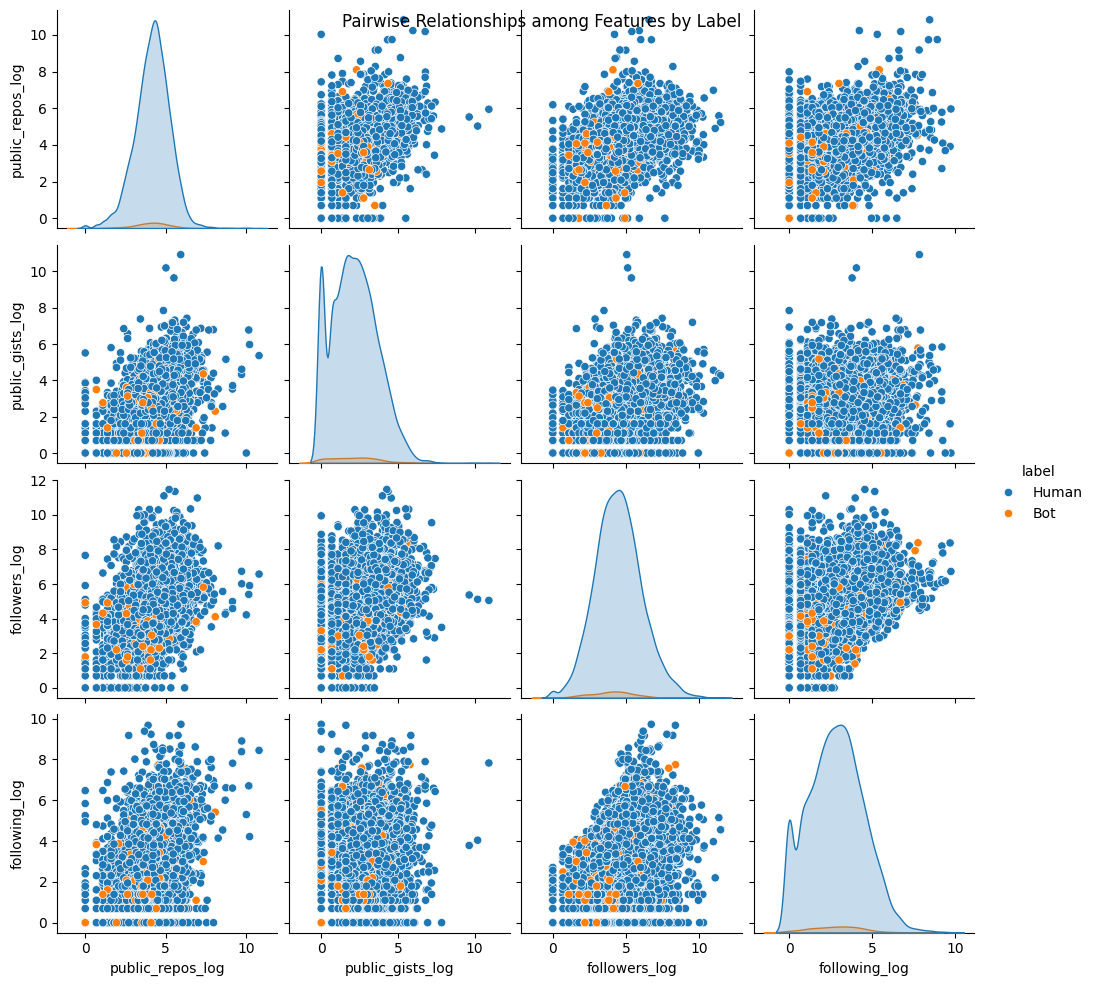

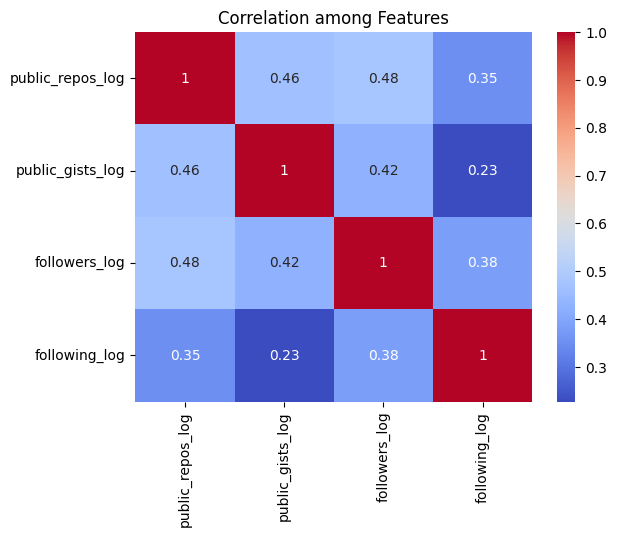

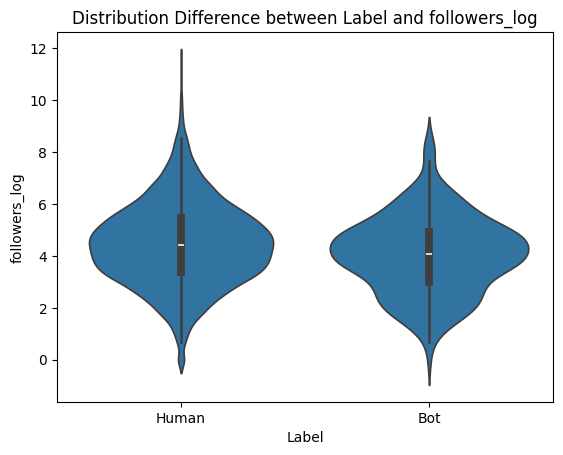

In [6]:
import seaborn as sns

# 1. 绘制箱线图
g = sns.boxplot(data=df, x='label', y='followers_log')
plt.xlabel('Label')
plt.ylabel('followers_log')
plt.title('Distribution of followers_log by Label')
plt.show()

# 2. 绘制成对图
numeric_features = ['public_repos_log', 'public_gists_log', 'followers_log', 'following_log']
g = sns.pairplot(data=df, vars=numeric_features, hue='label')
plt.suptitle('Pairwise Relationships among Features by Label')
plt.show()

# 3. 绘制热图
correlation_matrix = df[numeric_features].corr()
g = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation among Features')
plt.show()

# 4. 绘制小提琴图
g = sns.violinplot(data=df, x='label', y='followers_log')
plt.xlabel('Label')
plt.ylabel('followers_log')
plt.title('Distribution Difference between Label and followers_log')
plt.show()

7.使用pandas_profiling.ProfileReport()生成交互式数据分析报告，分析数据的统计分布、缺失值、异常值等。

In [14]:
import pandas_profiling
profile=pandas_profiling.ProfileReport(df)
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.48s/it]
